In [2]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Vertex Count comparison

    In this script, I will merge the Vertex Count data from the Open Boundaries simulations and Periodic Boundaries. 

In [30]:
free = pd.read_csv('OpenBound.dat', sep = "\t", index_col = [0,1])
per = pd.read_csv('PeriodicBound.dat', sep = "\t", index_col = [0,1])

In [37]:
per.sort_index(level = 0,ascending=True).tail(9)

mean       err    time
field  type                              
249000 Q = -2  0.163089  0.031719  2490.0
       Q = 0   0.842659  0.005381  2490.0
250000 Q = +1  0.460000  0.005525  2500.0
       Q = +2  0.076578  0.010607  2500.0
       Q = +3  0.008250  0.001074  2500.0
       Q = +4  0.008033  0.001397  2500.0
       Q = -1  0.531750  0.004791  2500.0
       Q = -2  0.151108  0.030372  2500.0
       Q = 0   0.853463  0.007264  2500.0

In [35]:
free.sort_index(level = 0,ascending=True)

mean       err    time
field    type                              
0.0      Q = +1  0.374723  0.006870     0.0
         Q = +2  0.240000  0.007612     0.0
         Q = +3  0.123503  0.004508     0.0
         Q = +4  0.057333  0.003534     0.0
         Q = -1  0.376940  0.004220     0.0
...                   ...       ...     ...
250000.0 Q = -1  0.557650  0.005016  2500.0
         Q = -2  0.021778  0.002142  2500.0
         Q = -3  0.002217  0.000000  2500.0
         Q = -4  0.004444  0.000000  2500.0
         Q = 0   0.856444  0.005778  2500.0

[675 rows x 3 columns]

In [23]:
free.sort_index(axis = 1)

err      mean    time
field    type                              
0.0      Q = +1  0.006870  0.374723     0.0
         Q = +2  0.007612  0.240000     0.0
         Q = +3  0.004508  0.123503     0.0
         Q = +4  0.003534  0.057333     0.0
         Q = -1  0.004220  0.376940     0.0
...                   ...       ...     ...
250000.0 Q = -1  0.005016  0.557650  2500.0
         Q = -2  0.002142  0.021778  2500.0
         Q = -3  0.000000  0.002217  2500.0
         Q = -4  0.000000  0.004444  2500.0
         Q = 0   0.005778  0.856444  2500.0

[675 rows x 3 columns]

In [9]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"])

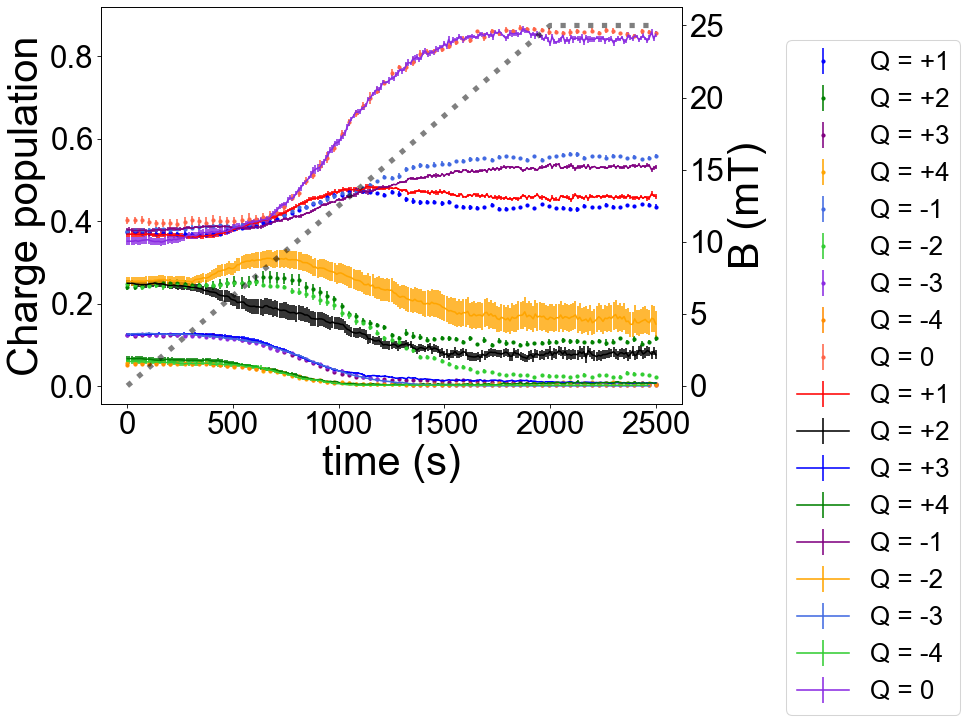

In [17]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()



for typ_m, mtype in free.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='.', label = typ_m)
    
for typ_m, mtype in per.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

plt.show()